In [1]:
%load_ext autoreload
%autoreload 2
%load_ext lab_black

In [3]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import sys
import yaml

sys.path.append("../")

from utils.dataset import DIV2K_Dataset
from utils.model import create_model
from utils.constants import HR_IMG_SIZE, DOWNSAMPLE_MODE

## Parameters

In [4]:
with open("config.yaml", "r") as stream:
    config = yaml.safe_load(stream)

model = keras.models.load_model("weights/model_00086.h5")

# Inference on Train Data

In [36]:
test_dataset = DIV2K_Dataset(
    hr_image_folder=config["data_path"],
    batch_size=config["batch_size"],
    set_type="test",
)

# Inference on Validation Data

In [5]:
val_dataset = DIV2K_Dataset(
    hr_image_folder=config["data_path"],
    batch_size=config["val_batch_size"],
    set_type="val",
)

# Visualizing

0.0016544721 0.9803019


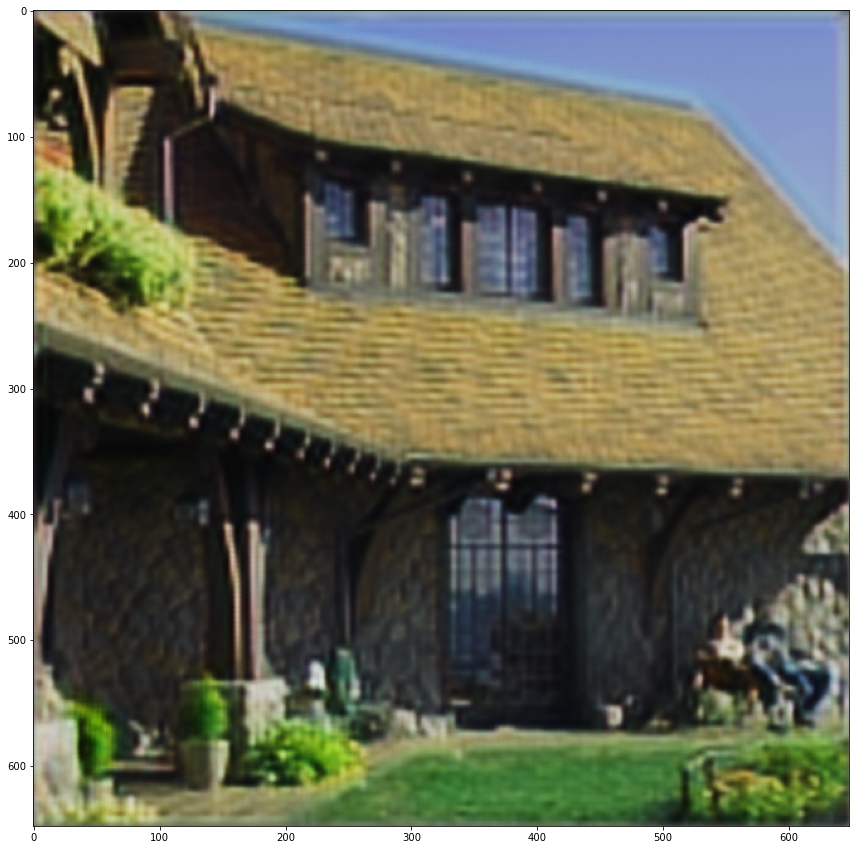

In [8]:
batch_id = 0
img_id = 5
batch = val_dataset.__getitem__(batch_id)

preds = model.predict(batch[0])
print(preds.min(), preds.max())
plt.figure(figsize=[15, 15])
plt.imshow(preds[img_id])

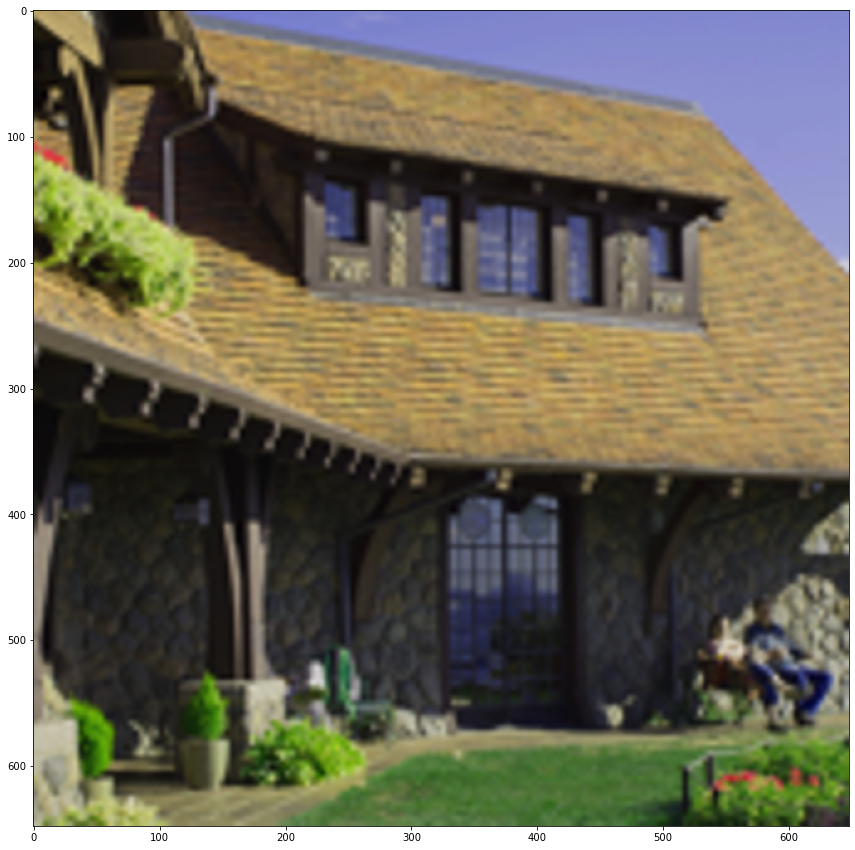

In [9]:
lr_image = Image.fromarray(np.array(batch[0][img_id] * 255, dtype="uint8"))
lr_image_resized = lr_image.resize(HR_IMG_SIZE, resample=DOWNSAMPLE_MODE)
plt.figure(figsize=[15, 15])
plt.imshow(lr_image_resized)

(-0.5, 647.5, 647.5, -0.5)

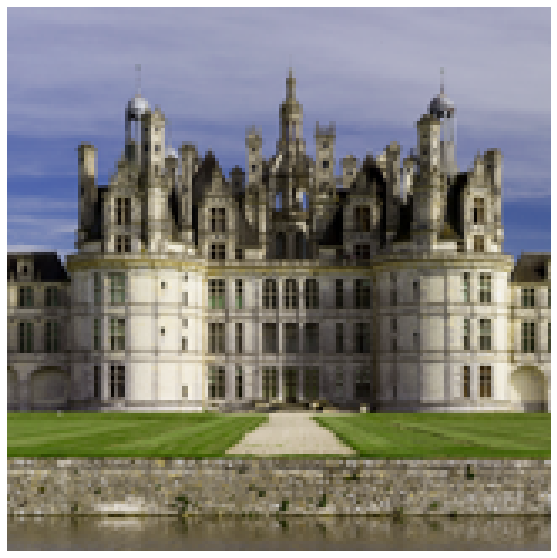

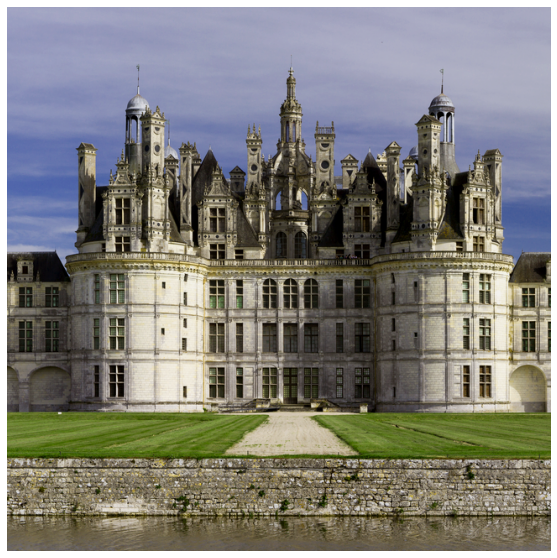

In [32]:
img_id = 13

plt.figure(figsize=[10, 10])
plt.imshow(batch[0][img_id])
plt.axis("off")

plt.figure(figsize=[10, 10])
plt.imshow(batch[1][img_id])
plt.axis("off")

(-0.5, 99.5, 99.5, -0.5)

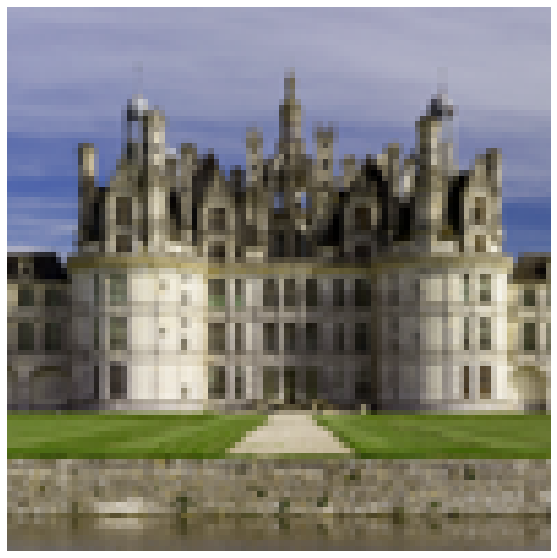

In [45]:
img = Image.fromarray(np.array(batch[0][img_id] * 255, dtype="uint8"))
img = img.resize((100, 100), resample=Image.BICUBIC)

plt.figure(figsize=[10, 10])
plt.imshow(img)
plt.axis("off")

In [40]:
img.size/

(162, 162)